LOADING THE DATASET...

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Basic EDA

In [2]:
df = pd.read_csv("dataset/questions.csv")
pd.set_option('display.max_columns',None)
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
print(df.isnull().sum())

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


Dropping the rows with NA values.

In [4]:
df = df.dropna()
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [5]:
print(df.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


Data Visualization...

In [6]:
duplicate_counts = df['is_duplicate'].value_counts()
print(duplicate_counts)

is_duplicate
0    255042
1    149306
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

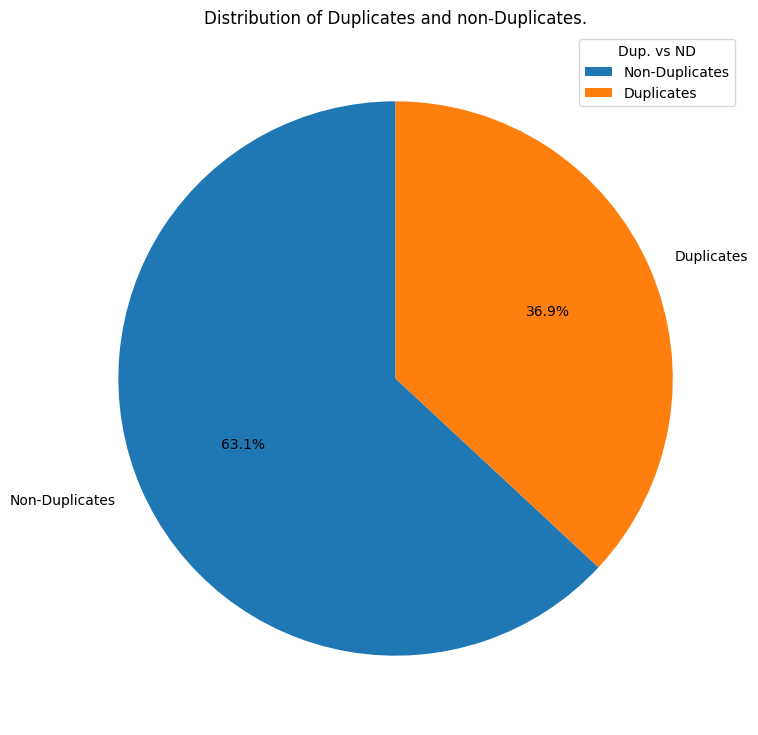

In [7]:
plt.figure(figsize=(9,9))
plt.pie(duplicate_counts ,labels=['Non-Duplicates','Duplicates'], startangle=90, autopct='%0.1f%%')
plt.title("Distribution of Duplicates and non-Duplicates.")
plt.legend(title='Dup. vs ND')
plt.show

Basic feature Engineering..

In [8]:

df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')

def basic_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    q1_len = len(q1)
    q2_len = len(q2)
    
    q1_word_set = set(q1.lower().split())
    q2_word_set = set(q2.lower().split())
    
    common_words = q1_word_set.intersection(q2_word_set)
    total_words = q1_word_set.union(q2_word_set)
    
    common_word_count = len(common_words)
    total_word_count = len(total_words)
    
    word_share_ratio = common_word_count / total_word_count if total_word_count != 0 else 0
    
    exact_match = 1 if q1.strip().lower() == q2.strip().lower() else 0
    
    return pd.Series([q1_len, q2_len, len(q1_word_set), len(q2_word_set), common_word_count, total_word_count, word_share_ratio, exact_match])


df[['q1_len', 'q2_len', 'q1_word_count', 'q2_word_count', 'common_word_count', 'total_word_count', 'word_share_ratio', 'exact_match']] = df.apply(basic_features, axis=1)

df


C:\Users\S\AppData\Local\Temp\ipykernel_2112\1119416378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question1'] = df['question1'].fillna('')
C:\Users\S\AppData\Local\Temp\ipykernel_2112\1119416378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question2'] = df['question2'].fillna('')
C:\Users\S\AppData\Local\Temp\ipykernel_2112\1119416378.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share_ratio,exact_match
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,12.0,11.0,10.0,13.0,0.769231,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8.0,12.0,4.0,16.0,0.250000,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14.0,10.0,4.0,20.0,0.200000,0.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,10.0,9.0,0.0,19.0,0.000000,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13.0,7.0,2.0,18.0,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85.0,79.0,13.0,12.0,11.0,14.0,0.785714,0.0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,41.0,42.0,8.0,8.0,5.0,11.0,0.454545,0.0
404348,404348,789796,789797,What is one coin?,What's this coin?,0,17.0,17.0,4.0,3.0,1.0,6.0,0.166667,0.0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94.0,127.0,17.0,23.0,1.0,39.0,0.025641,0.0


Fuzzy matching

In [9]:
pip install rapidfuzz


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from rapidfuzz import fuzz

def fuzzy_features_fast(row):
    q1 = row['question1']
    q2 = row['question2']
    
    ratio = fuzz.ratio(q1, q2)
    partial_ratio = fuzz.partial_ratio(q1, q2)
    token_sort_ratio = fuzz.token_sort_ratio(q1, q2)
    token_set_ratio = fuzz.token_set_ratio(q1, q2)
    
    return pd.Series([ratio, partial_ratio, token_sort_ratio, token_set_ratio])

df[['fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio']] = df.apply(fuzzy_features_fast, axis=1)


C:\Users\S\AppData\Local\Temp\ipykernel_2112\1963585987.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio']] = df.apply(fuzzy_features_fast, axis=1)
C:\Users\S\AppData\Local\Temp\ipykernel_2112\1963585987.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio']] = df.apply(fuzzy_features_fast, axis=1)
C:\Users\S\AppData\Local\Temp\ipyk

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share_ratio,exact_match,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,12.0,11.0,10.0,13.0,0.769231,0.0,92.682927,99.115044,91.056911,92.727273
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8.0,12.0,4.0,16.0,0.250000,0.0,64.748201,75.510204,61.870504,74.074074
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14.0,10.0,4.0,20.0,0.200000,0.0,54.545455,54.545455,54.545455,59.090909
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,10.0,9.0,0.0,19.0,0.000000,0.0,27.826087,30.000000,26.086957,26.548673
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13.0,7.0,2.0,18.0,0.111111,0.0,45.217391,63.636364,45.217391,46.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85.0,79.0,13.0,12.0,11.0,14.0,0.785714,0.0,87.804878,83.544304,64.634146,89.171975
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,41.0,42.0,8.0,8.0,5.0,11.0,0.454545,0.0,72.289157,79.411765,69.879518,77.611940
404348,404348,789796,789797,What is one coin?,What's this coin?,0,17.0,17.0,4.0,3.0,1.0,6.0,0.166667,0.0,76.470588,76.470588,76.470588,76.470588
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94.0,127.0,17.0,23.0,1.0,39.0,0.025641,0.0,39.819005,43.617021,41.628959,43.317972


Text Processing...

In [12]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    
    text = text.lower()
    
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
   
    text = re.sub(r'\d+', '', text)
    
    
    words = word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    
  
    return " ".join(cleaned)


In [14]:
df['clean_q1'] = df['question1'].apply(preprocess_text)
df['clean_q2'] = df['question2'].apply(preprocess_text)
df

C:\Users\S\AppData\Local\Temp\ipykernel_2112\3717599749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_q1'] = df['question1'].apply(preprocess_text)
C:\Users\S\AppData\Local\Temp\ipykernel_2112\3717599749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_q2'] = df['question2'].apply(preprocess_text)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share_ratio,exact_match,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,clean_q1,clean_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,12.0,11.0,10.0,13.0,0.769231,0.0,92.682927,99.115044,91.056911,92.727273,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8.0,12.0,4.0,16.0,0.250000,0.0,64.748201,75.510204,61.870504,74.074074,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14.0,10.0,4.0,20.0,0.200000,0.0,54.545455,54.545455,54.545455,59.090909,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,10.0,9.0,0.0,19.0,0.000000,0.0,27.826087,30.000000,26.086957,26.548673,mentally lonely solve,find remainder mathmath divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13.0,7.0,2.0,18.0,0.111111,0.0,45.217391,63.636364,45.217391,46.956522,one dissolve water quikly sugar salt methane c...,fish would survive salt water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85.0,79.0,13.0,12.0,11.0,14.0,0.785714,0.0,87.804878,83.544304,64.634146,89.171975,many keywords racket programming language late...,many keywords perl programming language latest...
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,41.0,42.0,8.0,8.0,5.0,11.0,0.454545,0.0,72.289157,79.411765,69.879518,77.611940,believe life death,true life death
404348,404348,789796,789797,What is one coin?,What's this coin?,0,17.0,17.0,4.0,3.0,1.0,6.0,0.166667,0.0,76.470588,76.470588,76.470588,76.470588,one coin,whats coin
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94.0,127.0,17.0,23.0,1.0,39.0,0.025641,0.0,39.819005,43.617021,41.628959,43.317972,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...


Advanced featuring techiniques...

1. Word Weighted Vector method...

In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer

def load_glove(path):
    embeddings_index = {}
    with open(path, encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            values = line.split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = vector
            except ValueError:
                print(f"Skipping line {line_num} due to error.")
                continue
    return embeddings_index



glove_path = 'vectorization_model/glove.840B.300d.txt'
embeddings_index = load_glove(glove_path)
print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")


all_text = pd.Series(df['clean_q1'].tolist() + df['clean_q2'].tolist())
tfidf = TfidfVectorizer()
tfidf.fit(all_text)

tfidf_vocab = tfidf.vocabulary_
idf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))


def sentence_vector(sentence, embeddings_index, tfidf_vocab, idf_dict):
    words = sentence.split()
    vector = np.zeros(300)  
    weight_sum = 0
    
    for word in words:
        if word in embeddings_index and word in tfidf_vocab:
            vec = embeddings_index[word]
            tfidf_weight = idf_dict.get(word, 0)
            vector += vec * tfidf_weight
            weight_sum += tfidf_weight
            
    if weight_sum != 0:
        vector /= weight_sum
        
    return vector


q1_vectors = np.vstack(df['clean_q1'].apply(lambda x: sentence_vector(x, embeddings_index, tfidf_vocab, idf_dict)))
q2_vectors = np.vstack(df['clean_q2'].apply(lambda x: sentence_vector(x, embeddings_index, tfidf_vocab, idf_dict)))


X_weighted_embed = np.hstack((q1_vectors, q2_vectors))


print("Shape of final feature matrix:", X_weighted_embed.shape)


Skipping line 52344 due to error.
Skipping line 128262 due to error.
Skipping line 151103 due to error.
Skipping line 200669 due to error.
Skipping line 209834 due to error.
Skipping line 220780 due to error.
Skipping line 253462 due to error.
Skipping line 365746 due to error.
Skipping line 532049 due to error.
Skipping line 717303 due to error.
Skipping line 994819 due to error.
Skipping line 1123332 due to error.
Skipping line 1148410 due to error.
Skipping line 1352111 due to error.
Skipping line 1499728 due to error.
Skipping line 1533810 due to error.
Skipping line 1899842 due to error.
Skipping line 1921153 due to error.
Skipping line 2058967 due to error.
Skipping line 2165247 due to error.
Loaded 2195885 word vectors from GloVe.
Shape of final feature matrix: (404348, 600)


In [16]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share_ratio,exact_match,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,clean_q1,clean_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,12.0,11.0,10.0,13.0,0.769231,0.0,92.682927,99.115044,91.056911,92.727273,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8.0,12.0,4.0,16.0,0.250000,0.0,64.748201,75.510204,61.870504,74.074074,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14.0,10.0,4.0,20.0,0.200000,0.0,54.545455,54.545455,54.545455,59.090909,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,10.0,9.0,0.0,19.0,0.000000,0.0,27.826087,30.000000,26.086957,26.548673,mentally lonely solve,find remainder mathmath divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13.0,7.0,2.0,18.0,0.111111,0.0,45.217391,63.636364,45.217391,46.956522,one dissolve water quikly sugar salt methane c...,fish would survive salt water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85.0,79.0,13.0,12.0,11.0,14.0,0.785714,0.0,87.804878,83.544304,64.634146,89.171975,many keywords racket programming language late...,many keywords perl programming language latest...
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,41.0,42.0,8.0,8.0,5.0,11.0,0.454545,0.0,72.289157,79.411765,69.879518,77.611940,believe life death,true life death
404348,404348,789796,789797,What is one coin?,What's this coin?,0,17.0,17.0,4.0,3.0,1.0,6.0,0.166667,0.0,76.470588,76.470588,76.470588,76.470588,one coin,whats coin
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94.0,127.0,17.0,23.0,1.0,39.0,0.025641,0.0,39.819005,43.617021,41.628959,43.317972,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...


Model training...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


In [18]:


y = df['is_duplicate']


X_train, X_test, y_train, y_test = train_test_split(X_weighted_embed, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
X_reduced = pca.fit_transform(X_weighted_embed)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

Logistic regression...

In [50]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
[[45816  5424]
 [20172  9458]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78     51240
           1       0.64      0.32      0.42     29630

    accuracy                           0.68     80870
   macro avg       0.66      0.61      0.60     80870
weighted avg       0.67      0.68      0.65     80870



XGBoost...

In [51]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


c:\Users\S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
[[43743  7497]
 [11760 17870]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     51240
           1       0.70      0.60      0.65     29630

    accuracy                           0.76     80870
   macro avg       0.75      0.73      0.73     80870
weighted avg       0.76      0.76      0.76     80870



Extra trees classifier...

In [52]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("Extra Trees Results")
print(confusion_matrix(y_test    , y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Results
[[48678  2562]
 [14197 15433]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     51240
           1       0.86      0.52      0.65     29630

    accuracy                           0.79     80870
   macro avg       0.82      0.74      0.75     80870
weighted avg       0.80      0.79      0.78     80870



In [53]:
print(X_weighted_embed)

[[-8.74383928e-02  2.71522068e-01  7.57832557e-02 ...  1.60673310e-02
   9.67973319e-02  1.49500540e-01]
 [ 1.66823789e-01 -6.27353261e-02  4.95428589e-01 ...  1.98798917e-01
  -2.55640857e-01  3.58790181e-01]
 [ 2.18123033e-02  3.09312724e-01 -5.81601837e-02 ... -1.38810562e-02
  -3.60397233e-01  4.87687490e-01]
 ...
 [ 5.54486215e-05 -6.03518719e-02  4.27864431e-01 ... -1.17135229e-01
   1.35864852e-01  3.33851704e-01]
 [-7.19901565e-04  1.66192724e-01  2.28574792e-01 ... -8.31297324e-02
  -9.74615232e-04  2.11417329e-01]
 [-2.42195213e-01 -1.20858090e-01 -3.95491460e-01 ... -9.28331566e-02
  -7.06997465e-02  2.06713931e-01]]


Decision Tree Classifier...


In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Results
[[37908 13332]
 [11922 17708]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     51240
           1       0.57      0.60      0.58     29630

    accuracy                           0.69     80870
   macro avg       0.67      0.67      0.67     80870
weighted avg       0.69      0.69      0.69     80870



Gradient Boosting Classifier...

In [55]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results
[[45757  5483]
 [17929 11701]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80     51240
           1       0.68      0.39      0.50     29630

    accuracy                           0.71     80870
   macro avg       0.70      0.64      0.65     80870
weighted avg       0.70      0.71      0.69     80870



Stochastic Gradient Boosting... (Hist Gradient Boosting)

In [56]:
sgb = HistGradientBoostingClassifier(random_state=42)
sgb.fit(X_train, y_train)
y_pred_sgb = sgb.predict(X_test)

print("Stochastic Gradient Boosting Results")
print(confusion_matrix(y_test, y_pred_sgb))
print(classification_report(y_test, y_pred_sgb))


Stochastic Gradient Boosting Results
[[44270  6970]
 [13799 15831]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81     51240
           1       0.69      0.53      0.60     29630

    accuracy                           0.74     80870
   macro avg       0.73      0.70      0.71     80870
weighted avg       0.74      0.74      0.73     80870



CatBoost Classifier...

In [57]:
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("CatBoost Results")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


CatBoost Results
[[44343  6897]
 [11160 18470]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     51240
           1       0.73      0.62      0.67     29630

    accuracy                           0.78     80870
   macro avg       0.76      0.74      0.75     80870
weighted avg       0.77      0.78      0.77     80870



Ada Boost Classifier...

In [58]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Results")
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Results
[[44876  6364]
 [19919  9711]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77     51240
           1       0.60      0.33      0.42     29630

    accuracy                           0.67     80870
   macro avg       0.65      0.60      0.60     80870
weighted avg       0.66      0.67      0.65     80870



K Nearest Neighbours(KNN)...

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Results")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Results
[[42842  8398]
 [ 9621 20009]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     51240
           1       0.70      0.68      0.69     29630

    accuracy                           0.78     80870
   macro avg       0.76      0.76      0.76     80870
weighted avg       0.78      0.78      0.78     80870



Random Foreset Classifier...

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Results
[[47483  3757]
 [13528 16102]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     51240
           1       0.81      0.54      0.65     29630

    accuracy                           0.79     80870
   macro avg       0.79      0.74      0.75     80870
weighted avg       0.79      0.79      0.77     80870



In [61]:
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": lr,
    "XGBoost": xgb,
    "Extra Trees": et,
    "Decision Tree": dt,
    "Gradient Boosting": gb,
    "Stochastic GB": sgb,
    "CatBoost": cat,
    "AdaBoost": ada,
    "KNN": knn,
    "Random Forest": rf
}

accuracy = {}


for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy[name] = acc


print(accuracy)


{'Logistic Regression': 0.6834920242364289, 'XGBoost': 0.7618770866823297, 'Extra Trees': 0.7927661679238284, 'Decision Tree': 0.6877210337578831, 'Gradient Boosting': 0.7104983306541363, 'Stochastic GB': 0.7431804130085322, 'CatBoost': 0.7767157165821689, 'AdaBoost': 0.6749969086187708, 'KNN': 0.7771856065289972, 'Random Forest': 0.7862619018177321}


In [62]:

accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])


accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


accuracy_df


,Model,Accuracy
0,Extra Trees,0.792766
1,Random Forest,0.786262
2,KNN,0.777186
3,CatBoost,0.776716
4,XGBoost,0.761877
5,Stochastic GB,0.743180
6,Gradient Boosting,0.710498
7,Decision Tree,0.687721
8,Logistic Regression,0.683492
9,AdaBoost,0.674997
